<a href="https://colab.research.google.com/github/crispu93/Pytorch_Pocket_Reference/blob/main/Introduction_to_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())

1.9.0+cu102
True


## A fun example

In [1]:
## We get a file from the web and download it to local environment

import urllib.request

url = 'https://pytorch.tips/coffee'
file_path = 'coffee.jpg'
urllib.request.urlretrieve(url, file_path)

('coffee.jpg', <http.client.HTTPMessage at 0x7fafb80e6790>)

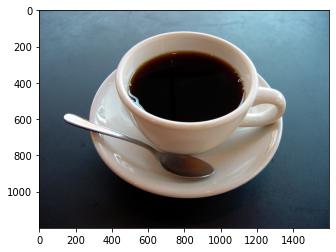

In [2]:
## Read the image

import matplotlib.pyplot as plt
from PIL import Image ## PIL stands for Pillow library

img = Image.open('coffee.jpg')
plt.imshow(img)

In [3]:
## Preprocessing image (transforms) using Torchvision

import torch
from torchvision import transforms

transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
      mean = [0.485, 0.456, 0.406],
      std = [0.229, 0.224, 0.225]
  )
])

## Convert the image to tensor
img_tensor = transform(img)
print(type(img_tensor), img_tensor.shape)

## Our model expect a batch of data as efficient machine learning processes data in batches
batch = img_tensor.unsqueeze(0)
print(batch)

<class 'torch.Tensor'> torch.Size([3, 224, 224])
tensor([[[[-0.1143, -0.1143, -0.0972,  ...,  0.3823,  0.4337,  0.4679],
          [-0.0972, -0.1314, -0.1486,  ...,  0.3823,  0.4166,  0.3994],
          [-0.1486, -0.1486, -0.1657,  ...,  0.3823,  0.4166,  0.3994],
          ...,
          [-1.8097, -1.8097, -1.7925,  ..., -1.6042, -1.5357, -1.5357],
          [-1.7754, -1.7754, -1.7583,  ..., -1.4843, -1.4500, -1.5528],
          [-1.7925, -1.7925, -1.7754,  ..., -1.4843, -1.5014, -1.5185]],

         [[ 0.5728,  0.6078,  0.5903,  ...,  1.3957,  1.4482,  1.4482],
          [ 0.5553,  0.5728,  0.5553,  ...,  1.3957,  1.4132,  1.3957],
          [ 0.5553,  0.5203,  0.5028,  ...,  1.3957,  1.4307,  1.4132],
          ...,
          [-1.7031, -1.7031, -1.7381,  ..., -1.1253, -1.1253, -1.1078],
          [-1.7206, -1.7031, -1.7381,  ..., -1.1954, -1.1779, -1.1954],
          [-1.7031, -1.7206, -1.7381,  ..., -1.1429, -1.1779, -1.2479]],

         [[ 1.0888,  1.1237,  1.1411,  ...,  1.9428, 

In [5]:
## AlexNet pretrained model
from torchvision import models

model = models.alexnet(pretrained = True)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

model.eval()
model.to(device)
y = model(batch.to(device))
print(y.shape)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

cuda
torch.Size([1, 1000])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [6]:
## Finding the winning class
y_max, index = torch.max(y, 1)
print(index, y_max)

tensor([967], device='cuda:0') tensor([22.8618], device='cuda:0', grad_fn=<MaxBackward0>)


In [8]:
## Looking for the label of the class
url = 'https://pytorch.tips/imagenet-labels'
fpath = 'imagenet_class_labels.txt'

urllib.request.urlretrieve(url, fpath)

with open(fpath) as f:
  classes = [line.strip() for line in f.readlines()]

print(classes[index])

967: 'espresso',


In [9]:
## Convert the output values to probabilities

prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
print(classes[index[0]], prob[index[0]].item())

967: 'espresso', 87.99555969238281


In [10]:
## Getting the top five probabilities

_, indices = torch.sort(y, descending=True)
for idx in indices[0][:5]: print(classes[idx], prob[idx].item())

967: 'espresso', 87.99555969238281
968: 'cup', 7.688892841339111
504: 'coffee mug', 3.861560583114624
925: 'consomme', 0.351296603679657
960: 'chocolate sauce, chocolate syrup', 0.05007759481668472
